In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
overdoses = pd.read_csv("FatalOverdoses.csv")

### A display of the first 10 lines of the csv file showing accidental overdoses:

In [41]:
overdoses.head(10)

,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,2021-03-29T16:02:00,Accident,41,F,W,MO,Heroin,Fentanyl,Acetyl Fentanyl,Oxycodone,Phenobarbital,Etizolam,Trazodone,Clonazepam,Acetaminophen,NaN,15110,NaN,2021
1,2018-06-20T18:14:00,Accident,50,F,W,MO,Alcohol,Carfentanil,Citalopram/Escitalopram,Clonazepam,Cocaine,Diphenhydramine,Methadone,Mirtazapine,Para-FluoroisobutyrylFentanyl,NaN,15235,NaN,2018
2,2018-04-23T20:34:00,Accident,40,M,W,MO,Cocaine,Despropionyl Fentanyl 4-ANPP,Fentanyl,Heroin,Methadone,Methoxyacetyl Fentanyl,Nordiazepam,Para-FluoroisobutyrylFentanyl,Phenobarbital,NaN,15209,NaN,2018
3,2018-01-24T13:47:00,Accident,48,F,W,MO,Acetaminophen,Alcohol,Butalbital,Cyclobenzaprine,Despropionyl Fentanyl 4-ANPP,Dextromethorphan,Fentanyl,Hydrocodone,Tramadol,NaN,15227,NaN,2018
4,2017-04-18T13:37:00,Accident,54,M,W,MO,Carfentanil,Chlordiazepoxide,Diazepam,Fentanyl,Heroin,Oxazepam,Para-Fluorobutyryl Fentanyl/FIBF,Temazepam,Tramadol,NaN,15221,NaN,2017
5,2021-03-30T16:15:00,Accident,54,M,W,MO,Methadone,Buprenorphine,Citalopram,Estilopram,Clonazepam,Oxycodone,Hydrocodone,Tramadol,NaN,NaN,15215,NaN,2021
6,2016-11-16T11:00:00,Accidents,49,M,W,MO,Alcohol,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15126,NaN,2016
7,2016-11-15T17:48:00,Accident,26,M,W,MO,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15088,NaN,2016
8,2016-11-13T13:53:00,Accidents,19,M,W,MO,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15209,NaN,2016
9,2016-11-11T12:32:00,Accidents,49,M,B,MO,Fentanyl,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2016


In [42]:
overdoses1 = overdoses.groupby("case_year").count()

### Here is a plot of the count of the number of overdoses each year 

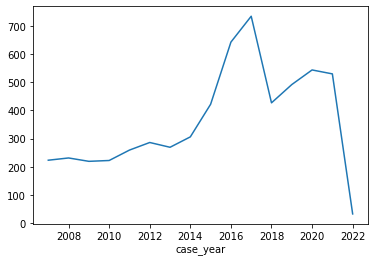

In [43]:
overdoses1["death_date_and_time"].plot()

### And here is a plot of the cumulative sum of cases per year

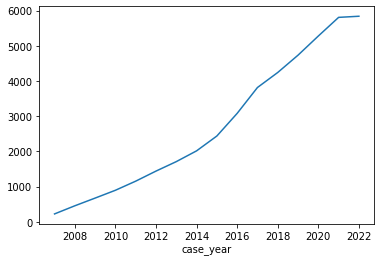

In [44]:
overdoses1["death_date_and_time"].cumsum().plot()

### This just gives an idea of how the accidental overdoses in all of Pittsburgh/Allegheny County are changing year to year

In [45]:
overdoses.rename(columns=({ 'incident_zip': 'Incident Zip', 'death_date_and_time': 'Count'}), inplace=True)
overdoses1 = overdoses.groupby("Incident Zip").count()
overdoses2 = overdoses1.filter(like = '151', axis = 0)
overdoses3 = overdoses1.filter(like = '152', axis = 0)
overdoses4 = overdoses1.filter(like = '153', axis = 0)
overdoses5 = pd.concat([overdoses2, overdoses3])
overdoses5 = pd.concat([overdoses5, overdoses4])

### Here I am counting the number of overdoses that occurred in each zip code. This is a plot of this data

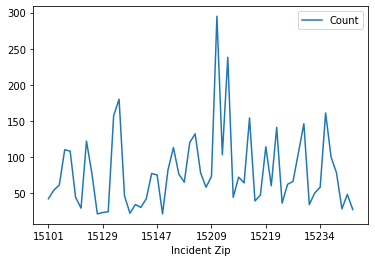

In [46]:
overdoses = overdoses5.iloc[0:, :1]
overdoses1 = overdoses[overdoses.Count > 20]
overdoses1.plot()

### This plot isn't the most helpful, as there are it is hard to look at the specific zip codes and exact counts of overdoses in each of those zip codes. 

### Instead, I will sort the data based on the number of counts of overdoses, which will allow me to see the zip codes with the fewest number of overdoses. 

In [53]:
overdoses1 = overdoses1.sort_values(by=["Count"], ascending=True)
overdoses1.head(20)

,Count
Incident Zip,
15148,21
15126,21
15139,22
15129,23
15131,24
15241,27
15238,28
15116,29
15143,30


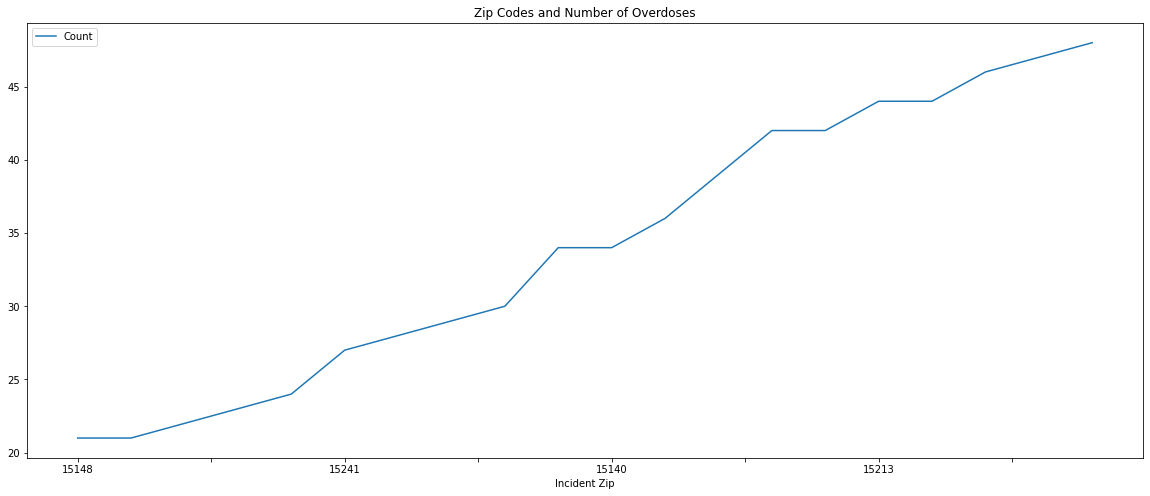

In [82]:
overdoses1 = overdoses1.head(20)
overdoses1.plot(title = "Zip Codes and Number of Overdoses", figsize = (20,8))